In [3]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine
import psycopg2

In [4]:
music_df = pd.read_csv('cleaned_music_data.csv')
music_df.rename(columns={'Unnamed: 0':'orig_index'},inplace=True)
music_df = music_df.set_index('orig_index')
music_df.head()

,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,loudness,name,popularity,tempo
orig_index,,,,,,,,,,,,
7606,1960,0.547,['Etta James'],0.274,179693,0.348,0,0.013300,-8.631,At Last,76,87.430
7607,1960,0.829,['Etta James'],0.421,196133,0.285,0,0.000002,-9.430,A Sunday Kind Of Love,70,85.861
7608,1960,0.764,['Ella Fitzgerald'],0.508,175987,0.287,0,0.000000,-12.472,Sleigh Ride,69,154.759
7609,1960,0.733,['Ella Fitzgerald'],0.579,131733,0.502,0,0.000000,-7.570,Frosty The Snowman,69,76.816
7610,1960,0.699,['Neil Sedaka'],0.743,139200,0.799,0,0.000000,-5.466,Breaking Up Is Hard to Do,62,116.112


In [5]:
music_df['popularity'].mean()

41.7907513477089

In [6]:
music_df['popularity'].max()

94

In [7]:
music_df['popularity'].std()

15.099922086111443

In [8]:
clustered_df = pd.read_csv('clustered_music_data.csv')
clustered_df

,Unnamed: 0,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,loudness,popularity,tempo,Class
0,7606,1960,0.547000,0.274,179693,0.348,0,0.013300,-8.631,76,87.430,4
1,7607,1960,0.829000,0.421,196133,0.285,0,0.000002,-9.430,70,85.861,4
2,7608,1960,0.764000,0.508,175987,0.287,0,0.000000,-12.472,69,154.759,4
3,7609,1960,0.733000,0.579,131733,0.502,0,0.000000,-7.570,69,76.816,4
4,7610,1960,0.699000,0.743,139200,0.799,0,0.000000,-5.466,62,116.112,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118715,170448,2019,0.226000,0.757,159547,0.688,0,0.000000,-4.546,71,155.994,0
118716,170449,2019,0.001210,0.449,247613,0.825,0,0.000000,-5.177,60,135.934,0
118717,170450,2019,0.016700,0.616,203555,0.469,0,0.000000,-7.380,63,135.035,0
118718,170451,2019,0.000755,0.766,196875,0.649,0,0.545000,-13.051,59,127.996,0


In [9]:
class_0 = clustered_df[(clustered_df['Class'] == 0)]

In [10]:
class_1 = clustered_df[(clustered_df['Class'] == 1)]

In [11]:
class_2 = clustered_df[(clustered_df['Class'] == 2)]

In [12]:
class_3 = clustered_df[(clustered_df['Class'] == 3)]

In [13]:
class_4 = clustered_df[(clustered_df['Class'] == 4)]

In [14]:
print(f"Class 0 has {class_0.count()['popularity']} songs and an average popularity of {class_0['popularity'].mean()}.")

Class 0 has 35567 songs and an average popularity of 54.295076897123735.


In [15]:
print(f"Class 1 has {class_1.count()['popularity']} songs and an average popularity of {class_1['popularity'].mean()}.")

Class 1 has 9346 songs and an average popularity of 36.041194093729935.


In [16]:
print(f"Class 2 has {class_2.count()['popularity']} songs and an average popularity of {class_2['popularity'].mean()}.")

Class 2 has 29593 songs and an average popularity of 34.08495252255601.


In [17]:
print(f"Class 3 has {class_3.count()['popularity']} songs and an average popularity of {class_3['popularity'].mean()}.")

Class 3 has 10783 songs and an average popularity of 53.60873597329129.


In [18]:
print(f"Class 4 has {class_4.count()['popularity']} songs and an average popularity of {class_4['popularity'].mean()}.")

Class 4 has 33431 songs and an average popularity of 33.104154826358766.


In [19]:
class_0['year'].mean()

2003.7096465825064

In [20]:
class_1['year'].mean()

1983.9186817890006

In [21]:
class_2['year'].mean()

1982.2615483391342

In [22]:
class_3['year'].mean()

2007.1148103496243

In [23]:
class_4['year'].mean()

1976.7063204809906

In [24]:
reclustered_df = pd.read_csv('clustered_w3PC_music_data.csv')
reclustered_df.head()

,Unnamed: 0,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,loudness,popularity,tempo,Class
0,7606,1960,0.547,0.274,179693,0.348,0,0.013300,-8.631,76,87.430,1
1,7607,1960,0.829,0.421,196133,0.285,0,0.000002,-9.430,70,85.861,1
2,7608,1960,0.764,0.508,175987,0.287,0,0.000000,-12.472,69,154.759,1
3,7609,1960,0.733,0.579,131733,0.502,0,0.000000,-7.570,69,76.816,0
4,7610,1960,0.699,0.743,139200,0.799,0,0.000000,-5.466,62,116.112,0


In [25]:
r_class_0 = reclustered_df[(reclustered_df['Class'] == 0)]
print(f"Class 0 has {r_class_0.count()['popularity']} songs and an average popularity of {r_class_0['popularity'].mean()}.")

Class 0 has 32471 songs and an average popularity of 35.69535893566567.


In [26]:
r_class_1 = reclustered_df[(reclustered_df['Class'] == 1)]
print(f"Class 1 has {r_class_1.count()['popularity']} songs and an average popularity of {r_class_1['popularity'].mean()}.")

Class 1 has 23903 songs and an average popularity of 31.997950048111115.


In [27]:
r_class_2 = reclustered_df[(reclustered_df['Class'] == 2)]
print(f"Class 2 has {r_class_2.count()['popularity']} songs and an average popularity of {r_class_2['popularity'].mean()}.")

Class 2 has 28774 songs and an average popularity of 57.00052130395496.


In [28]:
r_class_3 = reclustered_df[(reclustered_df['Class'] == 3)]
print(f"Class 3 has {r_class_3.count()['popularity']} songs and an average popularity of {r_class_3['popularity'].mean()}.")

Class 3 has 8027 songs and an average popularity of 37.80204310452224.


In [29]:
r_class_4 = reclustered_df[(reclustered_df['Class'] == 4)]
print(f"Class 4 has {r_class_4.count()['popularity']} songs and an average popularity of {r_class_4['popularity'].mean()}.")

Class 4 has 25545 songs and an average popularity of 42.82313564298297.


In [30]:
r_class_0['year'].mean()

1981.0012626651474

In [31]:
r_class_1['year'].mean()

1975.7149311801866

In [32]:
r_class_2['year'].mean()

2008.0152568290819

In [33]:
r_class_3['year'].mean()

1985.8916157966862

In [34]:
r_class_4['year'].mean()

1993.5294578195342

In [35]:
# division by other column
music_df['pop_ratio'] = (music_df['popularity'] / ((music_df['year'])-1959)).round(2)

music_df.head()

,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,loudness,name,popularity,tempo,pop_ratio
orig_index,,,,,,,,,,,,,
7606,1960,0.547,['Etta James'],0.274,179693,0.348,0,0.013300,-8.631,At Last,76,87.430,76.0
7607,1960,0.829,['Etta James'],0.421,196133,0.285,0,0.000002,-9.430,A Sunday Kind Of Love,70,85.861,70.0
7608,1960,0.764,['Ella Fitzgerald'],0.508,175987,0.287,0,0.000000,-12.472,Sleigh Ride,69,154.759,69.0
7609,1960,0.733,['Ella Fitzgerald'],0.579,131733,0.502,0,0.000000,-7.570,Frosty The Snowman,69,76.816,69.0
7610,1960,0.699,['Neil Sedaka'],0.743,139200,0.799,0,0.000000,-5.466,Breaking Up Is Hard to Do,62,116.112,62.0


In [36]:
music_df['pop_ratio'].mean()

2.3056391509434087

In [37]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Popularity')

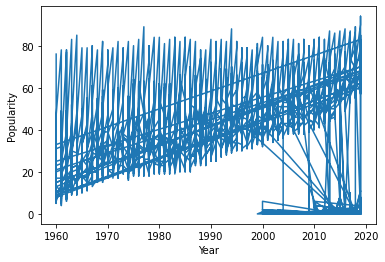

In [38]:
plt.plot(music_df['year'], music_df['popularity'])
plt.xlabel("Year")
plt.ylabel("Popularity")

In [39]:
popular_songs = music_df[(music_df['popularity']>=72)]
popular_songs

,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,loudness,name,popularity,tempo,pop_ratio
orig_index,,,,,,,,,,,,,
7606,1960,0.5470,['Etta James'],0.274,179693,0.348,0,0.013300,-8.631,At Last,76,87.430,76.00
7806,1961,0.9410,['Elvis Presley'],0.396,182360,0.293,0,0.000196,-14.062,Can't Help Falling in Love,78,100.307,39.00
8006,1962,0.9200,['Nat King Cole'],0.319,192160,0.210,0,0.000081,-15.231,The Christmas Song (Merry Christmas To You),77,78.696,25.67
8007,1962,0.8180,['Nat King Cole'],0.553,84987,0.337,0,0.000000,-10.334,Joy To The World,72,101.918,24.00
8009,1962,0.5700,['Ben E. King'],0.650,180056,0.306,0,0.000007,-9.443,Stand by Me,78,118.068,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170424,2019,0.2890,"['Kevin Roldan', 'Bryant Myers', 'Lyanno']",0.714,229827,0.671,0,0.000000,-5.119,Hasta Abajo,73,169.732,1.22
170434,2019,0.5770,['Rauf & Faik'],0.684,204490,0.760,0,0.000131,-5.033,это ли счастье?,73,154.033,1.22
170440,2019,0.1480,"['Sebastian Yatra', 'Reik']",0.771,164440,0.382,0,0.000000,-6.808,Un Año,73,94.931,1.22


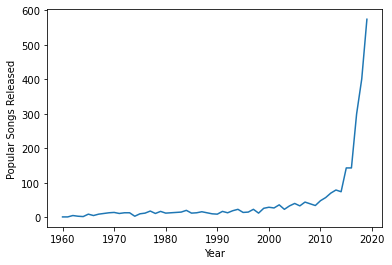

In [40]:
y = popular_songs['year'].value_counts().sort_index()
x = popular_songs['year'].unique()
plt.xlabel("Year")
plt.ylabel("Popular Songs Released")
plt.plot(x,y)

In [41]:
x

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=int64)

In [42]:
y

1960      1
1961      1
1962      5
1963      3
1964      2
1965      9
1966      5
1967      9
1968     11
1969     13
1970     14
1971     11
1972     13
1973     13
1974      3
1975     10
1976     12
1977     18
1978     11
1979     17
1980     12
1981     13
1982     14
1983     15
1984     20
1985     12
1986     13
1987     16
1988     13
1989     10
1990      9
1991     17
1992     13
1993     19
1994     23
1995     14
1996     15
1997     23
1998     12
1999     26
2000     29
2001     27
2002     36
2003     23
2004     33
2005     40
2006     33
2007     44
2008     39
2009     34
2010     48
2011     57
2012     70
2013     79
2014     74
2015    143
2016    143
2017    299
2018    401
2019    574
Name: year, dtype: int64

In [43]:
fig = px.scatter_3d(
    reclustered_df,
    x="PC1",
    y="PC2",
    z="PC2",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

NameError: name 'px' is not defined